In [247]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [2]:
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import KFold

In [3]:
data=pd.read_csv("C:\\ExcelR course\\Data science new\\assignments\\Neural Networks\\gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


EDA

In [212]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [213]:
data.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

Tuning batch and epoch

In [214]:
data.shape

(15039, 11)

In [215]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [220]:
import seaborn as sns

<AxesSubplot:xlabel='AT'>

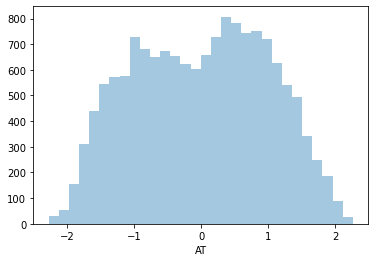

In [221]:
sns.distplot(data["AT"], kde=False,bins=30)

<AxesSubplot:xlabel='AP'>

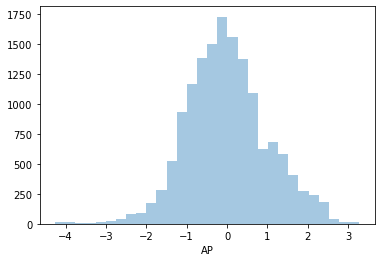

In [222]:
sns.distplot(data["AP"],kde=False,bins=30)

<AxesSubplot:xlabel='AH'>

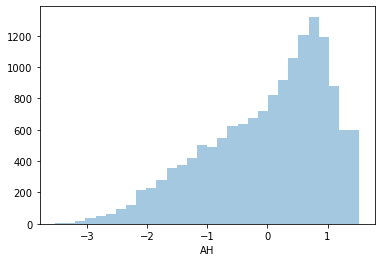

In [223]:
sns.distplot(data["AH"],kde=False,bins=30)

<AxesSubplot:xlabel='AFDP'>

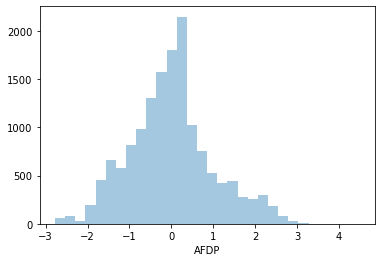

In [224]:
sns.distplot(data["AFDP"],kde=False,bins=30)

<AxesSubplot:xlabel='TIT'>

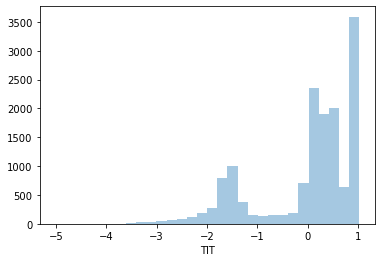

In [226]:
sns.distplot(data["TIT"],kde=False,bins=30)

<AxesSubplot:xlabel='GTEP'>

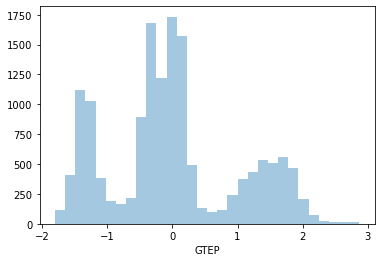

In [225]:
sns.distplot(data["GTEP"],kde=False,bins=30)

<AxesSubplot:xlabel='TAT'>

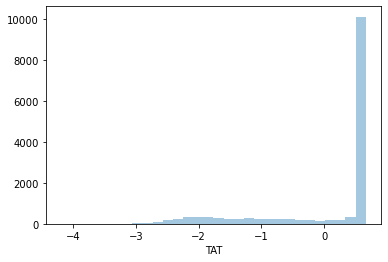

In [227]:
sns.distplot(data["TAT"],kde=False,bins=30)

<AxesSubplot:xlabel='TEY'>

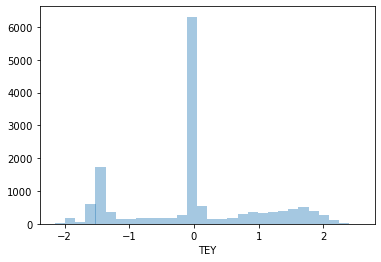

In [228]:
sns.distplot(data["TEY"],kde=False,bins=30)

<AxesSubplot:xlabel='CDP'>

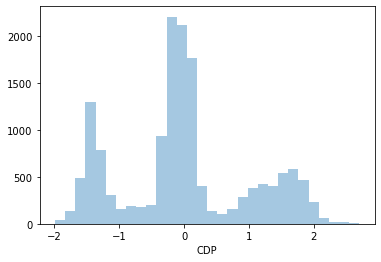

In [229]:
sns.distplot(data["CDP"],kde=False,bins=30)

<AxesSubplot:xlabel='CO'>

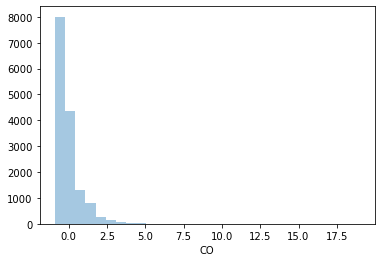

In [230]:
sns.distplot(data["CO"],kde=False,bins=30)

<AxesSubplot:xlabel='NOX'>

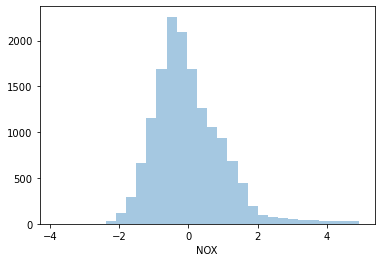

In [231]:
sns.distplot(data["NOX"],kde=False,bins=30)

In [232]:
data.skew()

AT     -0.030710
AP      0.107601
AH     -0.681224
AFDP    0.315150
GTEP    0.370987
TIT    -1.133744
TAT    -1.485524
TEY     0.145963
CDP     0.263042
CO      6.534577
NOX     1.126605
dtype: float64

Some features are normaly distributed.
Some features contains many outliers.

<AxesSubplot:xlabel='AT'>

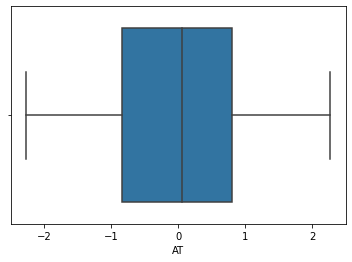

In [233]:
sns.boxplot(x='AT',data=data)

<AxesSubplot:xlabel='AP'>

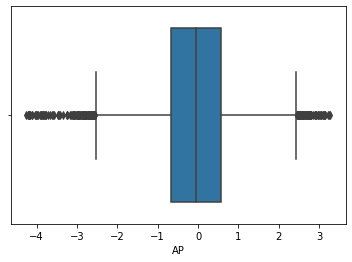

In [234]:
sns.boxplot(x='AP',data=data)

<AxesSubplot:xlabel='AH'>

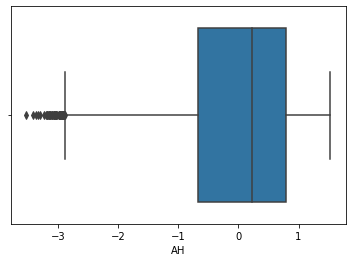

In [235]:
sns.boxplot(x='AH',data=data)

<AxesSubplot:xlabel='AFDP'>

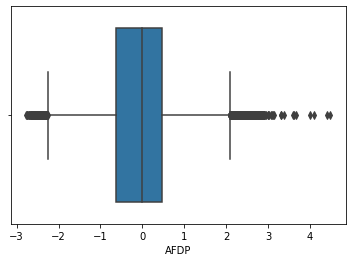

In [236]:
sns.boxplot(x='AFDP',data=data)

<AxesSubplot:xlabel='GTEP'>

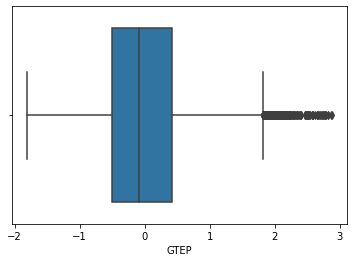

In [237]:
sns.boxplot(x='GTEP',data=data)

<AxesSubplot:xlabel='TIT'>

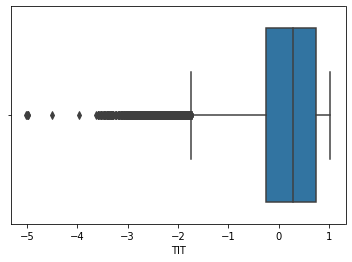

In [238]:
sns.boxplot(x='TIT',data=data)

<AxesSubplot:xlabel='TAT'>

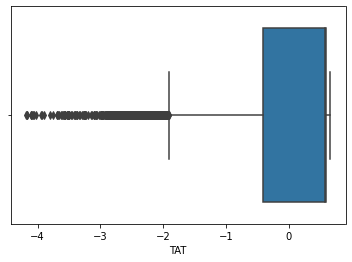

In [239]:
sns.boxplot(x='TAT',data=data)

<AxesSubplot:xlabel='TEY'>

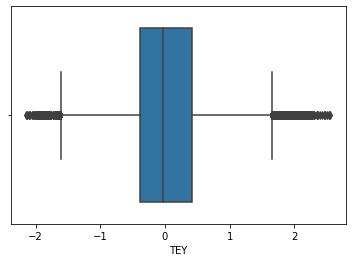

In [240]:
sns.boxplot(x='TEY',data=data)

<AxesSubplot:xlabel='CDP'>

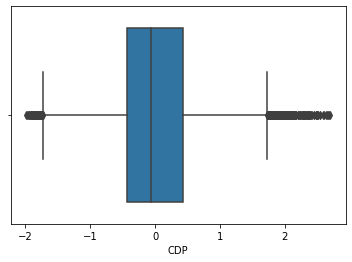

In [241]:
sns.boxplot(x='CDP',data=data)

<AxesSubplot:xlabel='CO'>

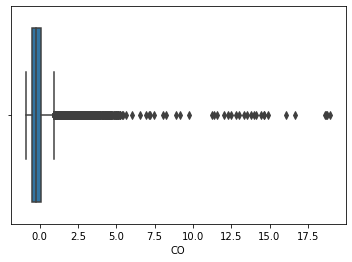

In [242]:
sns.boxplot(x='CO',data=data)

<AxesSubplot:xlabel='NOX'>

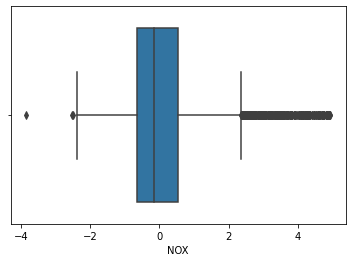

In [243]:
sns.boxplot(x='NOX',data=data)

In [245]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


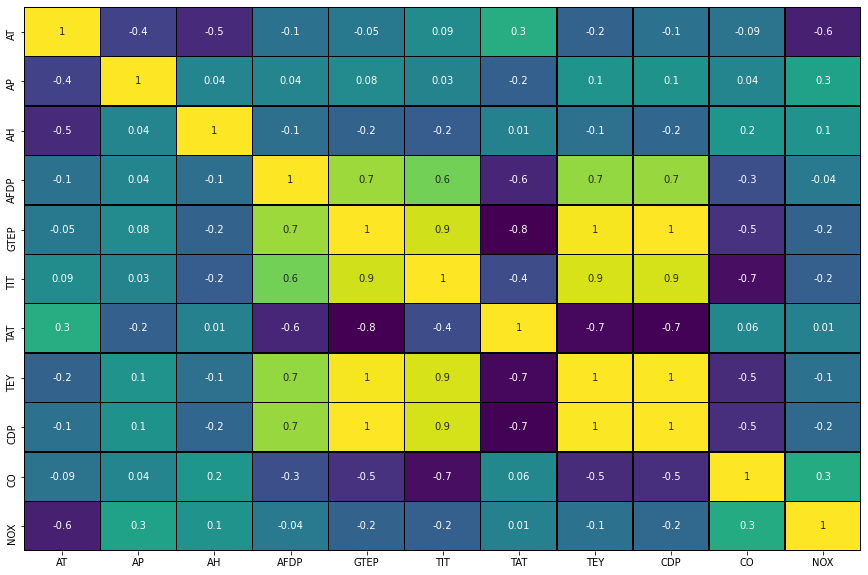

In [248]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black');

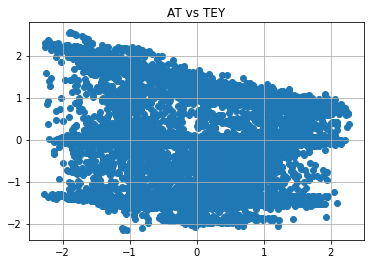

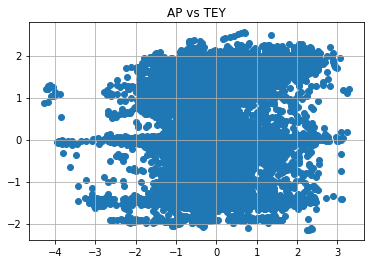

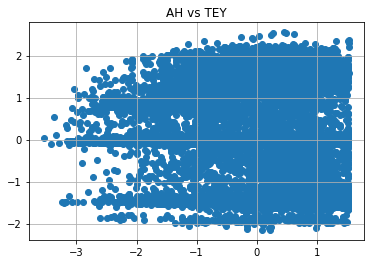

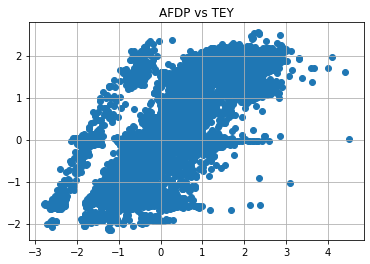

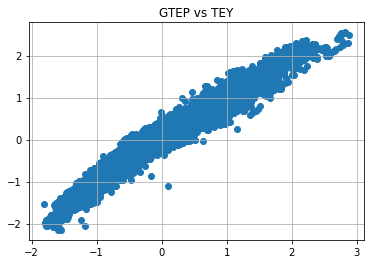

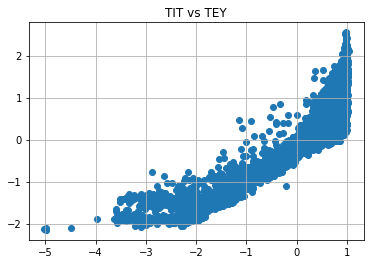

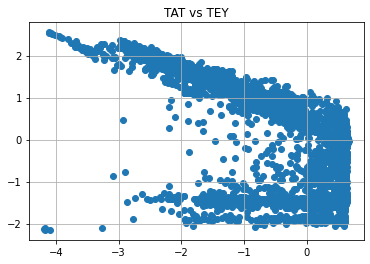

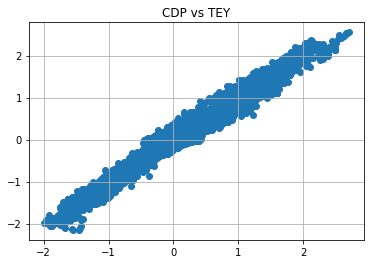

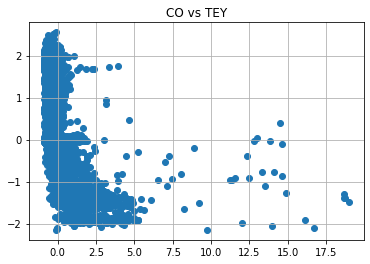

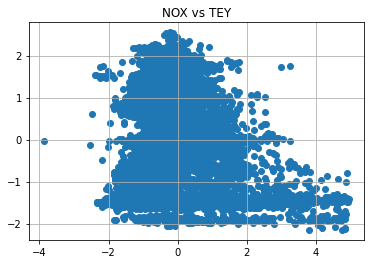

In [249]:
for i in data.columns:
    if i!="TEY": 
        plt.scatter((data[i]), (data['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

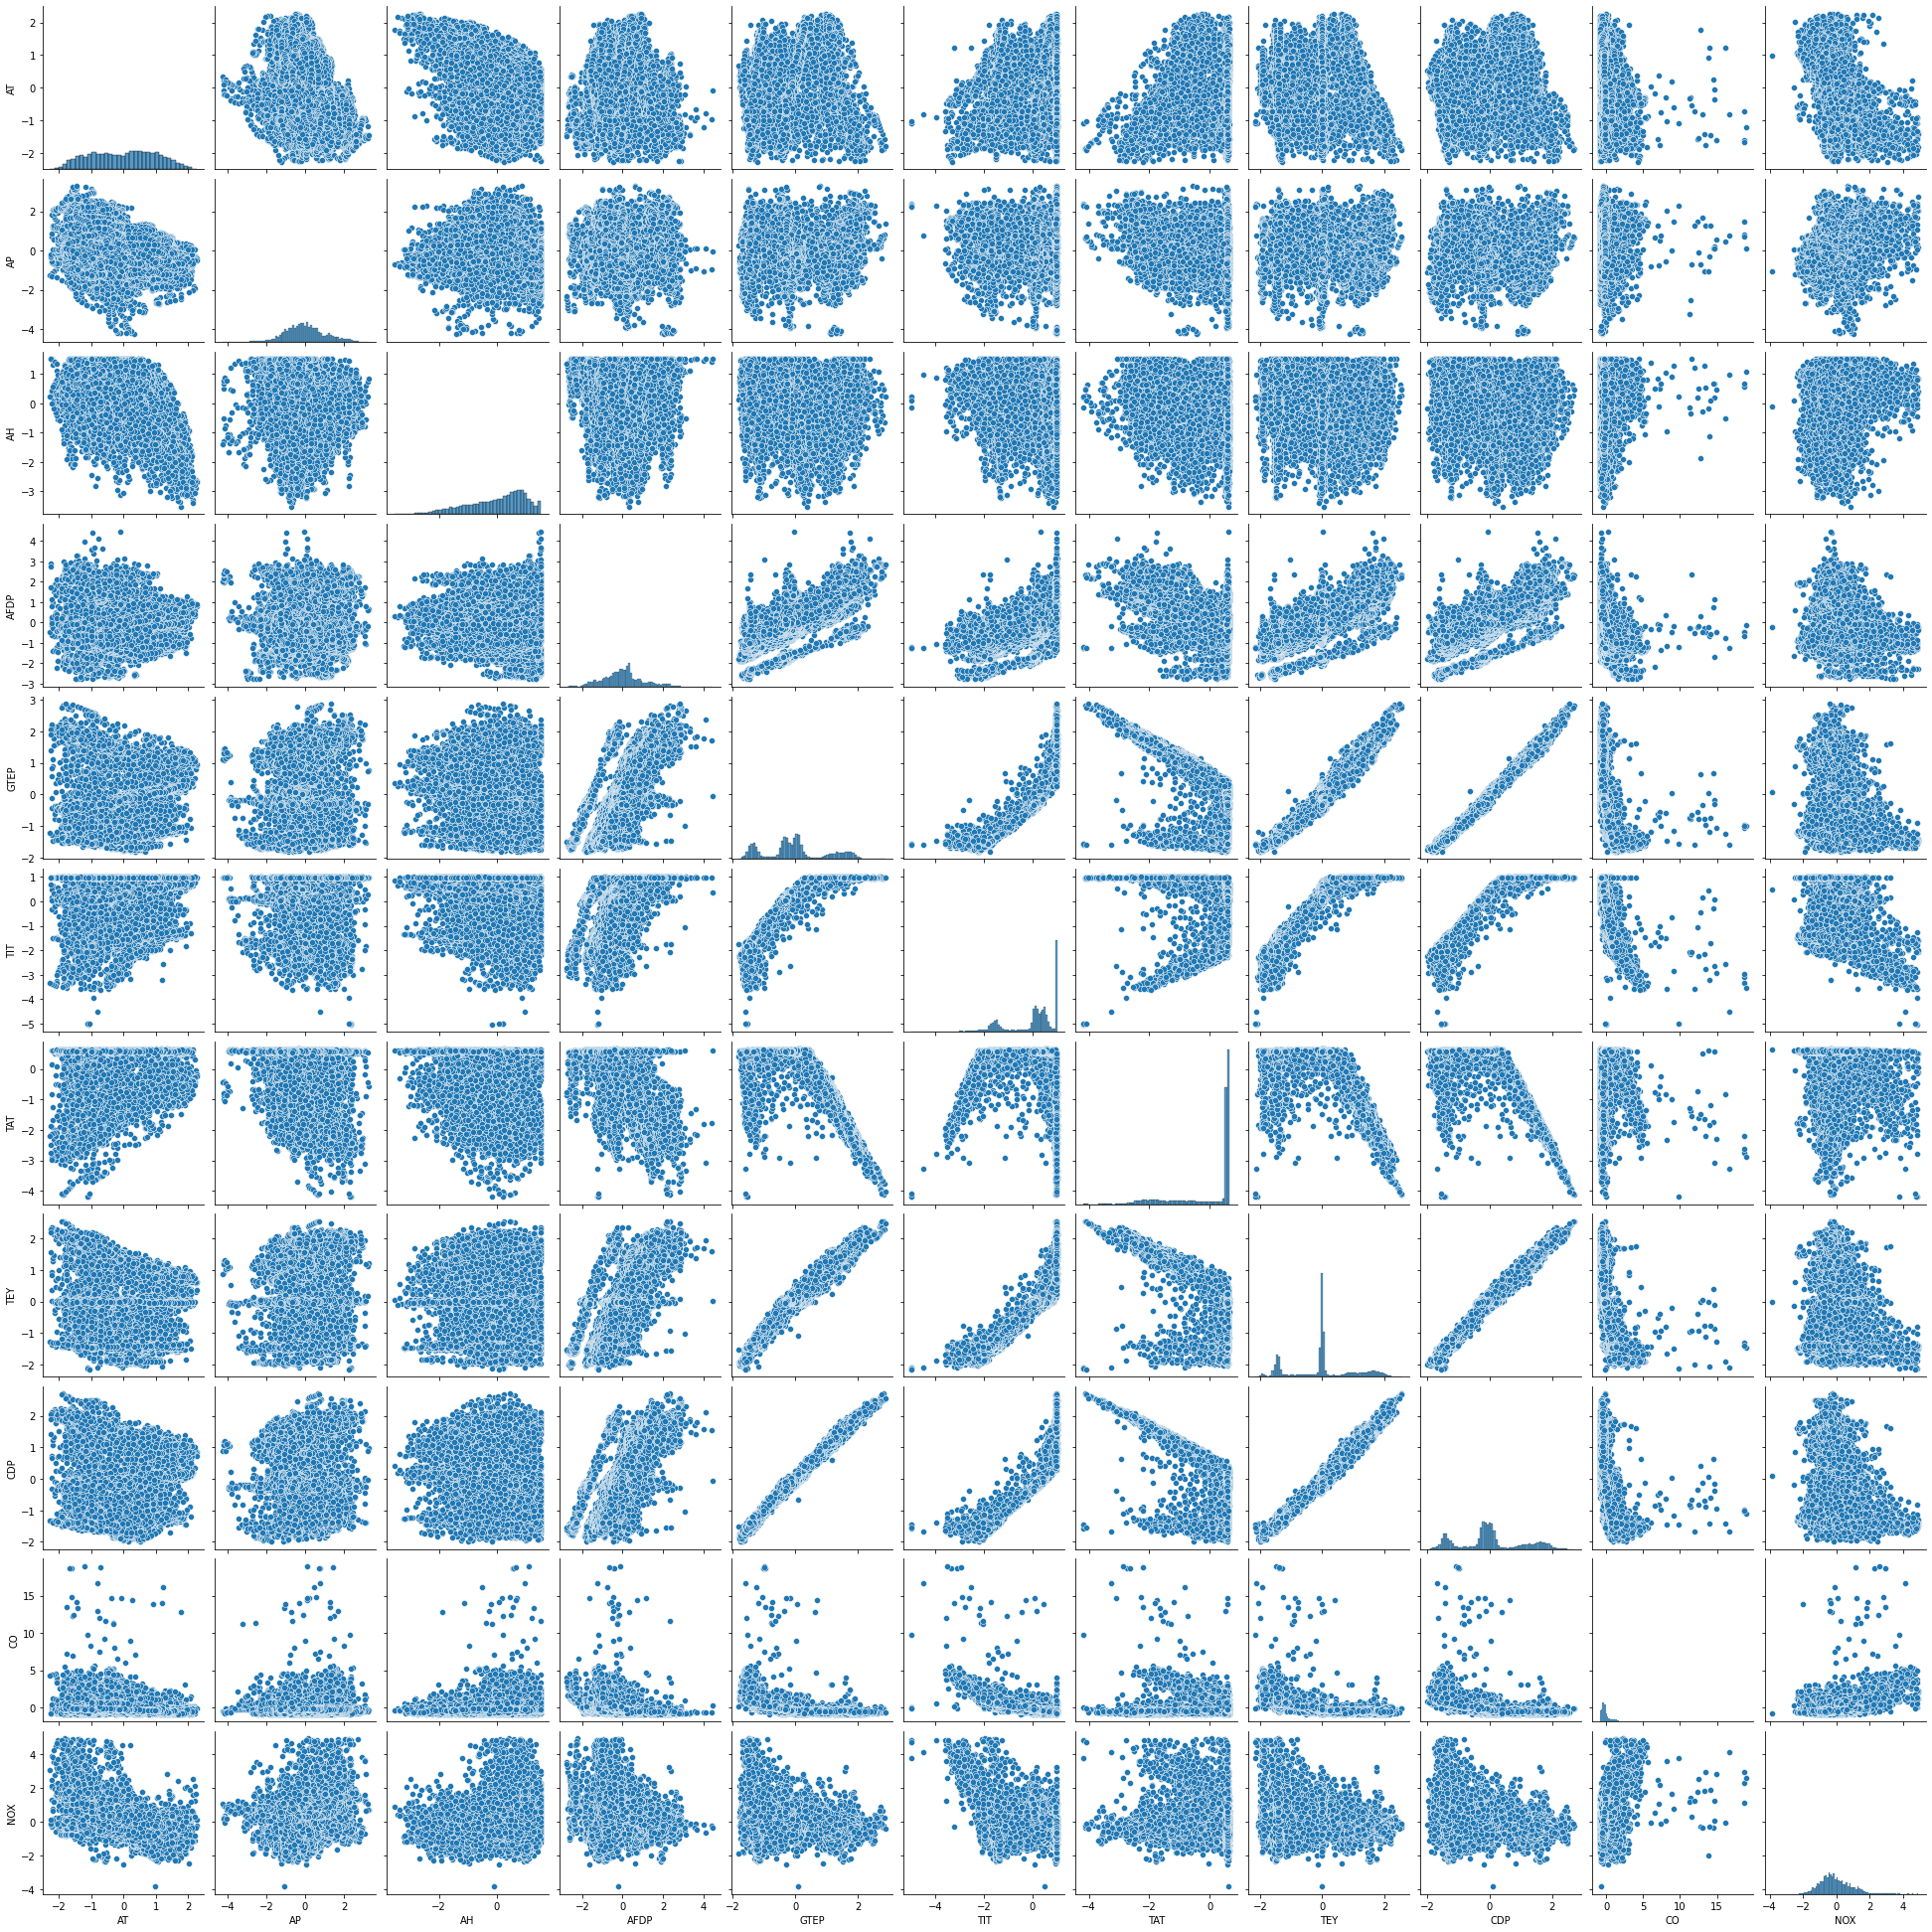

In [250]:
sns.pairplot(data)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()
standardized_data=scaler.fit_transform(data)
data=pd.DataFrame(standardized_data, columns=data.columns)

In [6]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [7]:
X=data.drop(["TEY"],axis=1)

In [8]:
y=data["TEY"]

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
def create_my_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
    optmizer=RMSprop(0.03)
    model.compile(loss='mean_squared_error',optimizer=optmizer, metrics=['accuracy'])
    return model
    

In [12]:
model = KerasRegressor(build_fn=create_my_model,verbose=0)

Hyper parameter tuning for batchsize and epochs

In [19]:
batch_size=[10,20,40,50]
epochs=[10,50,100,200]

In [20]:
parameter_grid = dict(batch_size=batch_size, epochs=epochs)
mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid,cv=KFold(),verbose=10)

In [21]:
grid_result = mygrid.fit(X_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.029 total time=  10.9s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.013 total time=   7.3s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.003 total time=   6.1s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.016 total time=   7.6s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.042 total time=   9.6s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=40, epochs=100;, score=-0.032 total time=  15.2s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=40, epochs=100;, score=-0.002 total time=  18.4s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=40, epochs=100;, score=-0.011 total time=  17.6s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=40, epochs=100;, score=-0.011 total time=  16.8s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=40, epochs=100;, score=-0.005 total time=  15.1s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=40, epochs=200;, score=-0.015 total time=  30.2s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [22]:
grid_result.best_params_

{'batch_size': 50, 'epochs': 200}

In [23]:
grid_result.best_score_

-0.007468622084707022

Here we got the best batch size as 50 and the best epochs as 100

Hyper tuning for finding optimal dropout rate

In [36]:
from keras.layers import Dropout

In [73]:
def create_my_model(dropout_rate):
    model1 = Sequential()
    model1.add(Dense(12,input_dim=10,kernel_initializer='normal',activation='relu'))
    model1.add(Dense(8,kernel_initializer='normal',activation='relu'))
    model1.add(Dense(1,activation='linear'))
    
    adam=Adam(lr=0.001)
    model1.compile(loss = 'mean_squared_error',optimizer=adam,metrics=['accuracy'])
    return model1
    

In [74]:
model1=KerasRegressor(build_fn=create_my_model,batch_size=50,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [75]:
grid_result2 = grid2.fit(X_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.002 total time=  36.9s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.002 total time=  30.5s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.001 total time=  30.5s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.001 total time=  30.5s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.002 total time=  30.5s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [78]:
grid_result2.best_score_

-0.0015049306908622383

In [79]:
grid_result2.best_params_

{'dropout_rate': 0.2}

Hyperparamter Tuning to find optimal Activation function and Kernel Initializer

In [150]:
def create_my_model(activation_function,init):
    model2 = Sequential()
    model2.add(Dense(12,input_dim=10,kernel_initializer=init,activation=activation_function))
    model2.add(Dropout(0.2))
    model2.add(Dense(8,kernel_initializer=init,activation=activation_function))
    model2.add(Dropout(0.2))
    model2.add(Dense(1,activation='linear'))
    
    adam = Adam(lr = 0.001)
    model2.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])
    return model2

In [151]:
model2 = KerasClassifier(build_fn= create_my_model,verbose=0,batch_size=50,epochs=200)


In [152]:
activation_function = ['softmax','relu','tanh','linear']
init = ['normal','uniform','zero']

In [156]:
param_grid = dict(activation_function=activation_function,init=init)

In [157]:
grid3=GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [158]:
grid_result3 = grid3.fit(X_test,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=normal...................
[CV 1/5; 1/12] END activation_function=softmax, init=normal;, score=0.000 total time=  41.1s
[CV 2/5; 1/12] START activation_function=softmax, init=normal...................
[CV 2/5; 1/12] END activation_function=softmax, init=normal;, score=0.000 total time=  32.7s
[CV 3/5; 1/12] START activation_function=softmax, init=normal...................
[CV 3/5; 1/12] END activation_function=softmax, init=normal;, score=0.000 total time=  29.9s
[CV 4/5; 1/12] START activation_function=softmax, init=normal...................
[CV 4/5; 1/12] END activation_function=softmax, init=normal;, score=0.000 total time=  27.5s
[CV 5/5; 1/12] START activation_function=softmax, init=normal...................
[CV 5/5; 1/12] END activation_function=softmax, init=normal;, score=0.000 total time=  28.4s
[CV 1/5; 2/12] START activation_function=softmax, init=uniform.......

[CV 3/5; 10/12] END activation_function=linear, init=normal;, score=0.000 total time=  25.2s
[CV 4/5; 10/12] START activation_function=linear, init=normal...................
[CV 4/5; 10/12] END activation_function=linear, init=normal;, score=0.000 total time=  25.0s
[CV 5/5; 10/12] START activation_function=linear, init=normal...................
[CV 5/5; 10/12] END activation_function=linear, init=normal;, score=0.000 total time=  24.9s
[CV 1/5; 11/12] START activation_function=linear, init=uniform..................
[CV 1/5; 11/12] END activation_function=linear, init=uniform;, score=0.002 total time=  26.2s
[CV 2/5; 11/12] START activation_function=linear, init=uniform..................
[CV 2/5; 11/12] END activation_function=linear, init=uniform;, score=0.000 total time=  20.0s
[CV 3/5; 11/12] START activation_function=linear, init=uniform..................
[CV 3/5; 11/12] END activation_function=linear, init=uniform;, score=0.000 total time=  19.6s
[CV 4/5; 11/12] START activation_f

In [159]:
grid_result3.best_params_

{'activation_function': 'tanh', 'init': 'normal'}

In [160]:
grid_result3.best_score_

0.0004429678898304701

Model Creation

In [189]:
seed = 7
numpy.random.seed(seed)

In [198]:
model_new = Sequential()
model_new.add(Dense(12, input_dim=10, kernel_initializer='normal',activation='tanh'))
model_new.add(Dense(8, kernel_initializer='normal',activation='tanh'))
model_new.add(Dense(1, kernel_initializer='normal',activation='tanh'))

model_new.compile(optimizer="adam", loss="mean_squared_error",metrics=["mean_absolute_error"])
model_new.fit(X_train, y_train, batch_size=50, epochs=200, verbose=1)

Epoch 1/200
211/211 [==============================] - 2s 3ms/step - loss: 0.4323 - mean_absolute_error: 0.4481
Epoch 2/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1695 - mean_absolute_error: 0.2924
Epoch 3/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1572 - mean_absolute_error: 0.2796
Epoch 4/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1527 - mean_absolute_error: 0.2734
Epoch 5/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1498 - mean_absolute_error: 0.2687
Epoch 6/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1476 - mean_absolute_error: 0.2654
Epoch 7/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1460 - mean_absolute_error: 0.2624
Epoch 8/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1448 - mean_absolute_error: 0.2603
Epoch 9/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1439 - mean_absolute_error:

211/211 [==============================] - 1s 4ms/step - loss: 0.1310 - mean_absolute_error: 0.2182
Epoch 146/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1310 - mean_absolute_error: 0.2184
Epoch 147/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1310 - mean_absolute_error: 0.2181
Epoch 148/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1310 - mean_absolute_error: 0.2182
Epoch 149/200
211/211 [==============================] - 1s 4ms/step - loss: 0.1310 - mean_absolute_error: 0.2182
Epoch 150/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1310 - mean_absolute_error: 0.2182
Epoch 151/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1310 - mean_absolute_error: 0.2181
Epoch 152/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1310 - mean_absolute_error: 0.2181
Epoch 153/200
211/211 [==============================] - 1s 3ms/step - loss: 0.1310 - mean_absolute_er

In [199]:
y_predict_test = model_new.predict(X_test)

141/141 [==============================] - 2s 4ms/step


In [201]:
predictions_data = pd.DataFrame(X_test)
predictions_data['Actual'] = y_test
predictions_data['Predicted'] = y_predict_test
print(predictions_data.shape)
predictions_data

(4512, 12)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Actual,Predicted
8185,-1.295034,0.483697,0.728184,1.062795,1.821837,0.974223,-2.239381,1.807215,-0.691358,-0.357197,1.904806,0.999989
8994,-1.586410,0.811282,-0.098251,-0.212050,-0.486864,-0.042280,0.587783,-0.319403,-0.007020,-0.746013,-0.032754,-0.039169
8944,-1.200871,2.121622,0.379601,1.633192,1.789731,0.992375,-2.358874,1.918713,-0.694018,-0.444778,1.846054,0.999988
3451,0.238527,0.312104,0.873910,-1.169860,-1.403779,-1.669894,0.567443,-1.634716,1.525787,-1.103885,-1.541991,-0.999986
8236,-1.477354,0.530495,0.720934,-0.567233,-0.451644,0.042429,0.573799,-0.260482,-0.153231,1.083363,0.051900,-0.003263
...,...,...,...,...,...,...,...,...,...,...,...,...
4964,0.882830,-0.062279,-0.378393,0.191807,0.065873,0.459921,0.589054,-0.007572,-0.742957,-0.491100,-0.025804,-0.022386
9159,-0.347816,-0.015481,0.781037,0.693009,0.101572,0.260251,0.165742,0.102113,-0.441459,0.238205,0.177617,0.186659
12903,0.349431,-0.436662,-0.804842,-1.414016,-1.301713,-1.518629,0.582698,-1.409001,0.419552,-0.550315,-1.431435,-0.999979
6025,0.008268,1.170065,0.698386,-0.883083,-1.456250,-1.669894,0.583969,-1.573981,1.262617,-0.708765,-1.542622,-0.999983


In [211]:
APE=100*(abs(predictions_data['Actual']-predictions_data['Predicted'])/predictions_data['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-numpy.mean(APE))

The Accuracy for Test Data -- ANN model =  91.97685527933312
